In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
from pathlib import Path
import geopandas
import fiona

# Load rental and home value data from Zillow

In [2]:
# Files to Load
homevalues_data_to_load = Path("Resources/zillow/Home_values.csv")
rentals_data_to_load = Path("Resources/zillow/Rentals.csv")

# Read Home Values and Rentals data files and store into Pandas DataFrames
home_values_data_df = pd.read_csv(homevalues_data_to_load)
rentals_data_df = pd.read_csv(rentals_data_to_load)

In [3]:
# Preview data
rentals_data_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1629.242622,...,2001.059639,2003.698184,2000.321428,2011.325499,2028.797203,2046.553696,2054.750052,2043.356299,2037.423493,2028.667312
1,91940,2,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1259.247016,...,1747.687237,1750.547753,1747.404695,1748.886799,1757.625595,1761.473108,1767.802445,1766.592068,1779.745781,1789.170452
2,92593,4,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1361.394189,...,2016.497134,2012.387028,2035.142050,2039.999302,2058.720070,2068.142179,2073.162509,2077.240323,2072.558575,2067.281322
3,62093,5,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2832.606339,2839.834567,2842.369853,2850.689315,2861.089431,2882.683156,2896.250166,2912.255726,2912.522698,2899.350980
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1432.122873,1428.138042,1434.759131,1435.028171,1465.724566,1489.823224,1495.844601,1489.703755,1483.052695,1490.744811


# Data Cleaning

Narrow down dataframes to Philadelphia, PA

In [4]:
# Narrow down dataframe to city = Philadelphia
philadelphia_home_values = home_values_data_df.loc[home_values_data_df["City"]=="Philadelphia",:]
philadelphia_rentals = rentals_data_df.loc[rentals_data_df["City"]=="Philadelphia",:]

In [5]:
# Narrow down dataframe to state = PA
philadelphiaPA_home_values = philadelphia_home_values.loc[philadelphia_home_values["State"]=="PA",:]
philadelphiaPA_rentals = philadelphia_rentals.loc[philadelphia_rentals["State"]=="PA",:]

In [6]:
# Inspect new rentals dataframe
philadelphiaPA_rentals.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
155,65787,165,19120,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1203.421072,1220.504884,1199.989943,1213.905556
208,65791,219,19124,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1196.900564,1237.621055,1247.973504,1259.517910,1248.797394,1265.692154,1275.242699,1262.787865,1253.558650,1253.625000
256,65779,270,19111,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1291.416404,1301.700648,1309.246023,1319.921192,1305.118156,1314.279459,1323.005592,1332.273373,1332.387246,1335.416667
306,65810,325,19143,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1354.242262,1354.961308,1370.727340,1355.199031,1366.772315,1367.153576,1380.082574,1384.937684,1383.230081,1380.625253
395,65816,418,19149,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,NaN,...,1432.011197,1420.907854,1435.803777,1457.702819,1477.249704,1467.589811,1437.167522,1422.150398,1423.788940,1421.388889


In [7]:
# Inspect new home values dataframe
philadelphiaPA_home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
106,65787,165,19120,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,46052.22798,...,160653.7685,160228.5333,159977.9659,159317.2287,159254.1569,158574.0554,157761.6849,156453.0387,156328.2412,157079.9906
160,65791,219,19124,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,36933.36134,...,155882.5954,155710.6857,156045.0456,155730.7655,156031.1885,155727.5066,155732.2020,155015.2869,155243.1947,155755.5130
211,65779,270,19111,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,77421.79785,...,280331.8575,278726.0215,277510.2150,275911.7848,275762.0408,275935.9873,276811.6406,277044.1193,278027.6078,279611.3808
265,65810,325,19143,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,26136.92897,...,130220.3908,129735.4468,129696.3963,129404.5409,129907.9231,130169.5887,130502.1901,129479.9742,128758.0187,127886.7503
358,65816,418,19149,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,62956.91926,...,225381.0579,223930.5154,222930.1662,222083.9724,221794.5496,221191.3808,220821.6689,220150.7617,220256.4486,220640.6397


Remove unnecessary columns

In [8]:
# Reduce columns to 2015-2023, as that is how far back we have rental data
# and we no longer need city, state, etc.
phila_homes = philadelphiaPA_home_values[['RegionName', '6/30/2015','6/30/2016','6/30/2017','6/30/2018',
                                         '6/30/2019','6/30/2020','6/30/2021','6/30/2022','6/30/2023']]

phila_rentals = philadelphiaPA_rentals[['RegionName', '2015-01-31', '2015-02-28',
'2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
'2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
'2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
'2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
'2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
'2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
'2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
'2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
'2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
'2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
'2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
'2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
'2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
'2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
'2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
'2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
'2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
'2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
'2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
'2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
'2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
'2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
'2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
'2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
'2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30']]

In [9]:
# Minor data wrangling
phl_zillow_homevalues = phila_homes.rename(columns={'RegionName':'Zip Code'})
phl_zillow_rentals = phila_rentals.rename(columns={'RegionName':'Zip Code'})

# Analysis

In [10]:
# Calculate % change in home values from June 2015 to June 2023
homevalue_change = (phl_zillow_homevalues["6/30/2023"] - phl_zillow_homevalues["6/30/2015"])/phl_zillow_homevalues["6/30/2015"] * 100
phl_zillow_homevalues["Percent Change 2015 to 2023"] = homevalue_change
phl_zillow_homevalues = phl_zillow_homevalues.loc[:,["Zip Code","6/30/2015", "6/30/2023","Percent Change 2015 to 2023"]]
phl_zillow_homevalues

,Zip Code,6/30/2015,6/30/2023,Percent Change 2015 to 2023
106,19120,75591.89726,157079.99060,107.800037
160,19124,71630.14476,155755.51300,117.444085
211,19111,148119.32580,279611.38080,88.774408
265,19143,44579.97191,127886.75030,186.870415
358,19149,116612.82470,220640.63970,89.207868
420,19134,43753.06559,102127.55170,133.418048
737,19140,23212.54237,80905.38434,248.541677
863,19104,90076.52706,215241.11710,138.953614
870,19148,150592.05880,251917.63270,67.284806
1088,19144,83556.39260,182693.89960,118.647424


In [11]:
# Inspect all columns to see when each zip code is missing data for rentals
# The pd.set_option code was found at https://www.geeksforgeeks.org/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
pd.set_option('display.max_columns', None)
phila_rentals

,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
155,19120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1203.421072,1220.504884,1199.989943,1213.905556
208,19124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,824.650071,828.747561,825.353084,834.573090,839.917632,861.077056,868.058480,875.725878,877.847804,879.392507,872.583475,884.562633,881.582248,896.793694,903.543641,900.121184,892.452145,884.044096,898.892494,904.686544,909.442599,894.826277,893.948103,NaN,922.580495,NaN,925.660613,927.555718,934.082194,942.923263,938.297057,942.770983,946.706778,964.155481,974.997306,981.296904,975.047146,972.581169,984.132806,994.444569,1004.535174,1001.427830,1009.421124,1026.747181,1037.584772,1049.404440,1035.822655,1034.332811,1026.171323,1034.691916,1049.219477,1059.666384,1067.493047,1047.987960,1070.420373,1064.456287,1096.891046,1113.694701,1138.913517,1142.810225,1118.485785,1122.904070,1117.183872,1142.447471,1132.384775,1150.715173,1166.162144,1193.345460,1184.368348,1179.625571,1182.933289,1196.900564,1237.621055,1247.973504,1259.517910,1248.797394,1265.692154,1275.242699,1262.787865,1253.558650,1253.625000
256,19111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1248.274729,1245.859311,1264.129550,1286.301451,1289.464529,1292.685959,1291.416404,1301.700648,1309.246023,1319.921192,1305.118156,1314.279459,1323.005592,1332.273373,1332.387246,1335.416667
306,19143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,956.093960,976.475932,965.478395,966.097370,972.378736,981.380354,995.436310,997.986901,996.267557,983.899081,988.783033,980.751226,998.036474,981.648530,999.422944,1002.027594,1017.370836,1007.238797,1002.170728,1009.540235,1021.436855,1023.235686,1026.629147,1027.374219,1040.160599,1050.361940,1055.989133,1061.555711,1055.178865,1055.596479,1058.481919,1064.372295,1076.482395,1070.177383,1073.428634,1074.218420,1073.600418,1081.763439,1071.461382,1082.746291,1089.348268,1101.946158,1108.759391,1109.669280,1104.045339,1120.113641,1124.087299,1133.476393,1132.977256,1133.971848,1145.519868,1143.077826,1147.407799,1150.742792,1152.699105,1163.090509,1178.404117,1180.407737,1199.214232,1210.371491,1227.412281,1218.481265,1223.186632,1223.811888,1233.713133,1230.079032,1235.419399,1240.000635,1241.014234

In [12]:
# Record the missing data
print("Some zip codes are missing rental data for earlier years...")
print("Zip codes that start in 2015: 19104, 19146, 19147, 19128, 19121, 19123, 19106, 19127, 19125, 19103, 19130")
print("Zip codes that start in 2016: 19143, 19134, 19139")
print("Zip codes that start in 2017: 19124, 19148, 19144, 19131")
print("Zip codes that start in 2018: 19145, 19132, 19122, 19107, 19102")
print("Zip codes that start in 2020: 19129")
print("Zip codes that start in 2021: 19118")
print("Zip codes that start in 2022: 19140, 19111, 19149, 19136, 19135, 19141, 19151, 19114, 19138, 19119, 19133")

Some zip codes are missing rental data for earlier years...
Zip codes that start in 2015: 19104, 19146, 19147, 19128, 19121, 19123, 19106, 19127, 19125, 19103, 19130
Zip codes that start in 2016: 19143, 19134, 19139
Zip codes that start in 2017: 19124, 19148, 19144, 19131
Zip codes that start in 2018: 19145, 19132, 19122, 19107, 19102
Zip codes that start in 2020: 19129
Zip codes that start in 2021: 19118
Zip codes that start in 2022: 19140, 19111, 19149, 19136, 19135, 19141, 19151, 19114, 19138, 19119, 19133


In [13]:
# Calculate % change in rentals from June 2022 to June 2023
# Since there is not enough data to compare against home values, we will not attempt to compare head-to-head by zip code
rentals_change = (phl_zillow_rentals["2023-06-30"] - phl_zillow_rentals["2022-06-30"])/phl_zillow_rentals["2022-06-30"] * 100

# Add % change to dataframe
phl_zillow_rentals["Percent Change 2022 to 2023"] = rentals_change

# Calculate absolute change in rentals from June 2022 to June 2023
rental_annual_increase = phl_zillow_rentals["2023-06-30"] - phl_zillow_rentals["2022-06-30"]
phl_zillow_rentals["Year-over-Year Change"] = rental_annual_increase

# Display only the columns we want, and drop zip codes with missing data
phl_zillow_rentals = phl_zillow_rentals.loc[:,["Zip Code","2022-06-30", "2023-06-30",
                                               "Year-over-Year Change", "Percent Change 2022 to 2023"]]
phl_zillow_rentals = phl_zillow_rentals.dropna()
phl_zillow_rentals.head()

,Zip Code,2022-06-30,2023-06-30,Year-over-Year Change,Percent Change 2022 to 2023
208,19124,1184.368348,1253.625000,69.256652,5.847560
256,19111,1286.301451,1335.416667,49.115216,3.818329
306,19143,1345.198855,1380.625253,35.426398,2.633544
395,19149,1411.217865,1421.388889,10.171024,0.720727
454,19134,1333.997185,1389.818519,55.821334,4.184517


In [14]:
# Read in polygon zip code .shp file from OpenDataPhilly (https://opendataphilly.org/datasets/zip-codes/)
# See geopandas user guide (https://geopandas.org/en/latest/docs/user_guide/mapping.html)
phl_zips = geopandas.GeoDataFrame.from_file('Resources/zipcodes/Zipcodes_Poly.shp')

In [15]:
# Manually add column with percent changes from phl_zillow_rentals
phl_zips_rentals = phl_zips
phl_zips_rentals["Percent Change 2022 to 2023"]=[None, -1.02, 5.82, 0.31, 5.85, 2.15, None, 4.13, 5.17, 1.05, 0.05, 3.65,
                                                 1.42, 0.92, None, 3.82, None, -0.55, None, None, 10.23, 2.31, 0.72, None,
                                                 8.19, None, None, None, None, 1.70, 4.94, None, 9.11, None, 4.12, 4.97, None,
                                                 2.72, 5.64, 0.79, 10.20, 4.89, 2.63, -0.54, 5.60, 3.89, 2.35, 4.74]

In [16]:
phl_zips_rentals.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",NaN
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",-1.02
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985...",5.82
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970...",0.31
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039...",5.85


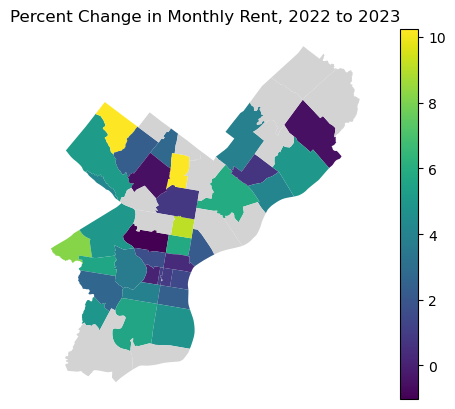

In [17]:
ax = phl_zips_rentals.plot(column='Percent Change 2022 to 2023', legend=True, missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()
ax.set_title('Percent Change in Monthly Rent, 2022 to 2023')
plt.show()

In [18]:
# Sort home values data by zip code to make it easier adding percent change to geopandas dataframe
phl_homevalues_sorted = phl_zillow_homevalues.sort_values(by="Zip Code")
phl_homevalues_sorted.head()

,Zip Code,6/30/2015,6/30/2023,Percent Change 2015 to 2023
12796,19102,343783.84480,350159.3781,1.854518
4608,19103,428469.14480,495322.2664,15.602786
863,19104,90076.52706,215241.1171,138.953614
8409,19106,315786.72120,416606.2029,31.926447
7381,19107,217079.60310,313022.8957,44.197286


In [19]:
# Manually add column with percent changes from phl_zillow_homevalues
phl_zips_sorted = phl_zips.sort_values(by="CODE")
phl_zips_homevalues = phl_zips_sorted
phl_zips_homevalues["Percent Change 2015 to 2023"]=[1.85, 15.60, 138.95, 31.93, 44.20, None, 88.77, None, 64.14, 64.49, 67.44,
                                                   61.74, 63.94, 107.80, 326.55, 114.01, 45.63, 117.44, 74.78, 75.51, 46.81,
                                                   53.46, 63.81, 34.34, 108.83, 338.66, 274.61, 133.42, 93.95, 84.89, 77.11,
                                                   109.10, 231.72, 248.54, 90.05, 153.68, 186.87, 118.65, 94.36, 66.55, 41.88,
                                                   67.28, 89.21, 66.50, 80.22, 73.56, 80.57, 57.62]
phl_zips_homevalues.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023,Percent Change 2015 to 2023
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",1.05,1.85
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",0.05,15.60
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",3.65,138.95
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",1.42,31.93
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",0.92,44.20


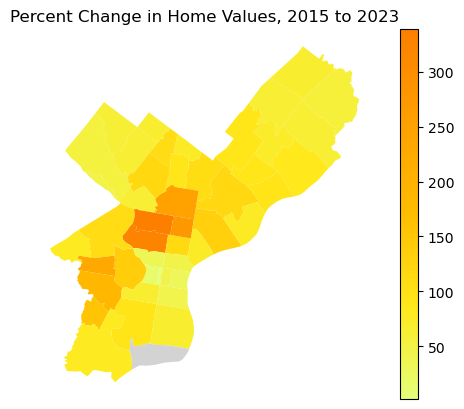

In [20]:
ax = phl_zips_homevalues.plot(column='Percent Change 2015 to 2023', legend=True, missing_kwds={'color': 'lightgrey'}, cmap='Wistia')
ax.set_axis_off()
ax.set_title('Percent Change in Home Values, 2015 to 2023')
plt.show()

In [21]:
# Files to Load
tax_data_to_load = Path("Resources/taxes/tax_delinquencies_philadelphia.csv")

# Read tax delinquencies file and store into Pandas DataFrames, and look at only cases with >$100 due
tax_delinquencies = pd.read_csv(tax_data_to_load)
tax_delinquencies_over100 = tax_delinquencies[tax_delinquencies['total_due']>100]

# Count number of cases per zip code
td_by_zip = tax_delinquencies_over100['zip_code'].value_counts()

In [32]:
tax_delinquencies_over100

,zip_code,zip_4,unit_type,unit_num,owner,co_owner,principal_due,penalty_due,interest_due,other_charges_due,total_due,is_actionable,payment_agreement,num_years_owed,most_recent_year_owed,oldest_year_owed
0,19102.0,4223.0,NaN,NaN,ACADEMY OF MUSIC OF PHILA INC,ACADEMY OF MUSIC OF PHILA INC,361147.54,24501.46,77797.86,28467.89,491914.75,True,False,6,2021,2015
1,19118.0,3246.0,NaN,NaN,CHESTNUT HILL,CHESTNUT HILL,68708.49,4809.60,28235.68,6759.84,108513.61,True,False,5,2019,2015
2,19130.0,3805.0,NaN,NaN,MORRIS LOUISE,MORRIS LOUISE,76914.74,6151.00,15960.40,7306.06,106332.20,True,False,6,2021,2015
3,19134.0,6106.0,NaN,NaN,3000 E TIOGA ST LLC,3000 E TIOGA ST LLC,64704.79,4395.17,15848.35,16711.42,101659.73,True,False,7,2021,2015
4,19111.0,5242.0,NaN,NaN,GENESIS BAPTIST CHURCH,GENESIS BAPTIST CHURCH,64699.35,4906.39,18989.10,7081.19,95676.03,True,False,7,2021,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31498,19126.0,2743.0,NaN,NaN,SHARPE ALICE R,SHARPE ALICE R,0.00,1.20,1.80,97.12,100.12,True,False,1,2021,2021
31499,19144.0,3339.0,NaN,NaN,JACKSON WHITNYE SHARL,JACKSON WHITNYE SHARL,4.69,0.28,2.90,92.24,100.11,True,False,1,2021,2021
31500,19143.0,3104.0,NaN,NaN,LINDSEY ELIZABETH R,LINDSEY ELIZABETH R,0.00,1.19,1.80,97.11,100.10,True,False,1,2021,2021
31501,19120.0,3915.0,NaN,NaN,MUSTAFA KARIMEH F,MUSTAFA KARIMEH F,0.00,0.00,7.30,92.76,100.06,True,False,1,2021,2021


In [22]:
# Prepare tax delinquency data for merging with home values data
td_df = pd.DataFrame(td_by_zip).reset_index()
td_df = td_df.rename(columns={'index':'zip', 'zip_code':'tax_delinquencies'})

# This drops a "1.0" and "19192.0" zip code which are not valid
td_df = td_df.drop([46,49])
td_df.head()

,zip,tax_delinquencies
0,19132.0,2401
1,19140.0,2389
2,19143.0,2103
3,19134.0,1917
4,19139.0,1555


In [23]:
# Prepare home values data to merge with tax delinquencies data
hv_df = phl_zillow_homevalues.rename(columns={'Zip Code':'zip'})
hv_df.head()

,zip,6/30/2015,6/30/2023,Percent Change 2015 to 2023
106,19120,75591.89726,157079.9906,107.800037
160,19124,71630.14476,155755.5130,117.444085
211,19111,148119.32580,279611.3808,88.774408
265,19143,44579.97191,127886.7503,186.870415
358,19149,116612.82470,220640.6397,89.207868


In [24]:
# Merge home values and tax delinquencies data
hv_td = pd.merge(td_df, hv_df, how="outer", on="zip")

# Remove 19112 and 19108 because they are missing data
hv_td_clean = hv_td.drop([46,47])
hv_td_clean.head()

,zip,tax_delinquencies,6/30/2015,6/30/2023,Percent Change 2015 to 2023
0,19132.0,2401,15734.31781,69020.88960,338.664646
1,19140.0,2389,23212.54237,80905.38434,248.541677
2,19143.0,2103,44579.97191,127886.75030,186.870415
3,19134.0,1917,43753.06559,102127.55170,133.418048
4,19139.0,1555,35326.89080,117185.50580,231.717576


In [25]:
# Define a function to create Linear Regression plots
def regression_line(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values,regress_values,color="red")
    print(f"The equation of the regression line is {line_eq}")
    print(f"The r-squared is: {rvalue**2}")

The equation of the regression line is y = 6.98x + -61.51
The r-squared is: 0.6876287034216779
-------------------------------------
The correlation between both factors is 0.83
The p-value of Pearson's r correlation coefficient is 1.0905397617108628e-12


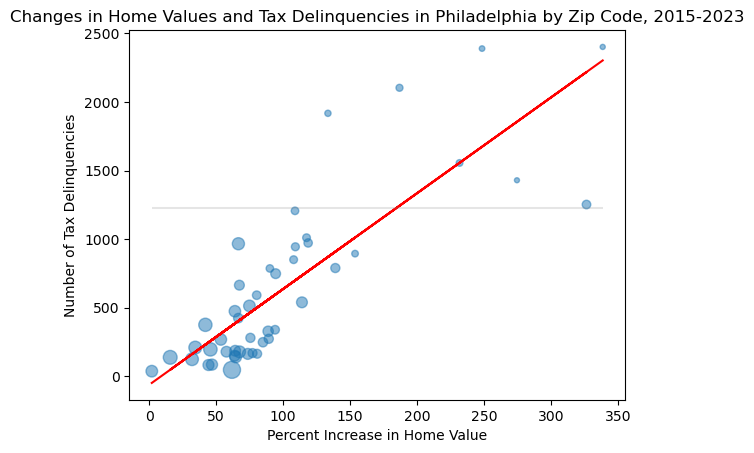

In [26]:
# Scatter plot of % change in home values vs. tax delinquencies
x_values = hv_td_clean["Percent Change 2015 to 2023"]
y_values = hv_td_clean["tax_delinquencies"]
homevalue_2023 = hv_td_clean["6/30/2023"]/5000

plt.scatter(x_values, y_values,s=homevalue_2023, alpha=0.5)
plt.xlabel("Percent Increase in Home Value")
plt.ylabel("Number of Tax Delinquencies")
plt.title("Changes in Home Values and Tax Delinquencies in Philadelphia by Zip Code, 2015-2023")

# Add regression line using defined function
regression_line(x_values, y_values)

print('-------------------------------------')

# Calculate Pearson's r for the scatter plot
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The p-value of Pearson's r correlation coefficient is {correlation[1]}")

# Add horizontal reference line at 1225 tax delinquencies
xmin=min(x_values)
xmax=max(x_values)
plt.hlines(1225, xmin, xmax, colors="gray", alpha=0.2)
           
plt.show()

In [27]:
priority_zips_df = hv_td_clean[hv_td_clean['tax_delinquencies']>1225]
priority_zips_df

,zip,tax_delinquencies,6/30/2015,6/30/2023,Percent Change 2015 to 2023
0,19132.0,2401,15734.31781,69020.88960,338.664646
1,19140.0,2389,23212.54237,80905.38434,248.541677
2,19143.0,2103,44579.97191,127886.75030,186.870415
3,19134.0,1917,43753.06559,102127.55170,133.418048
4,19139.0,1555,35326.89080,117185.50580,231.717576
5,19133.0,1429,17772.53125,66578.04336,274.612048
6,19121.0,1252,44643.06884,190426.19390,326.552652


In [28]:
# Convert zipcodes to integers to remove the trailing zero
priority_zips = priority_zips_df['zip'].astype(int)

# Make a list of the priority zips to print out
priority_zips_list = [zipcode for zipcode in priority_zips]
print('TO MITIGATE RISK OF DISPLACEMENT ASSOCIATED WITH GENTRIFICATION...')
print('The following zip codes should be prioritized:')
print(f'{priority_zips_list}')

TO MITIGATE RISK OF DISPLACEMENT ASSOCIATED WITH GENTRIFICATION...
The following zip codes should be prioritized:
[19132, 19140, 19143, 19134, 19139, 19133, 19121]


In [31]:
# Manually add priority status (true/false)
phl_zips_homevalues["Priority Zip"] = [False, False, False, False, False, False, False, False, False, False, False,
                                       False, False, False, True, False, False, False, False, False, False,
                                       False, False, False, False, True, True, True, False, False, False,
                                       False, True, True, False, False, True, False, False, False, False,
                                       False, False, False, False, False, False, False]
phl_zips_homevalues

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,Percent Change 2022 to 2023,Percent Change 2015 to 2023,Priority Zip
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",1.05,1.85,False
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",0.05,15.60,False
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",3.65,138.95,False
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",1.42,31.93,False
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",0.92,44.20,False
14,15,19109,9,9.469785e+04,1248.210416,"POLYGON ((-75.16403 39.95008, -75.16343 39.950...",NaN,NaN,False
15,16,19111,11,1.458023e+08,68750.201529,"POLYGON ((-75.05538 40.07679, -75.05553 40.076...",3.82,88.77,False
16,17,19112,12,8.886162e+07,48233.604282,"POLYGON ((-75.19244 39.89761, -75.19194 39.896...",NaN,NaN,False
17,18,19114,14,1.586637e+08,58745.716719,"POLYGON ((-74.99876 40.08133, -74.99724 40.080...",-0.55,64.14,False
18,19,19115,15,1.305048e+08,58802.804113,"POLYGON ((-75.03779 40.10688, -75.03716 40.106...",NaN,64.49,False


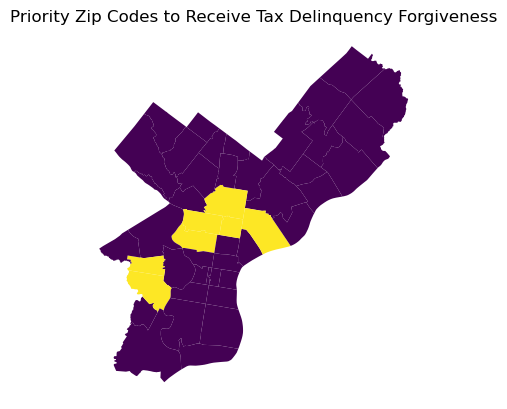

In [30]:
# Map the priority zip codes
ax = phl_zips_homevalues.plot(column='Priority Zip', legend=False, missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()
ax.set_title('Priority Zip Codes to Receive Tax Delinquency Forgiveness')
plt.show()